Random Forest

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [2]:
##Create fake data where log(p/(1-p))=5+10*x1+3*x2+5*x3-2*x4+4*x5
size=10000
x=np.concatenate([np.random.beta(0.2,0.5, (size,1))*100-50,np.random.beta(0.5,0.5, (size,1))*100-50,np.random.beta(0.5,0.2, (size,1))*100-50,np.random.beta(0.1,0.1, (size,1))*100-50,np.random.beta(0.7,0.1, (size,1))*100-50],axis=1)
y=np.round(np.array([1/(1+np.exp(-np.array([10*x[:,0]+3*x[:,1]+5*x[:,2]-2*x[:,3]+4*x[:,4]+5]).T))]).T)[0]
print(x.shape,y.shape)

(10000, 5) (10000, 1)


c:\users\python36\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


(array([5179.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        4821.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

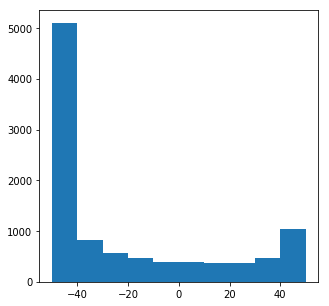

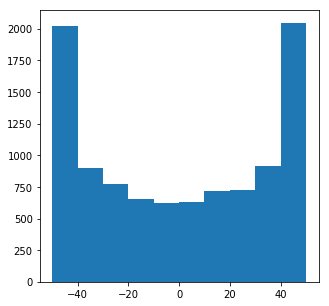

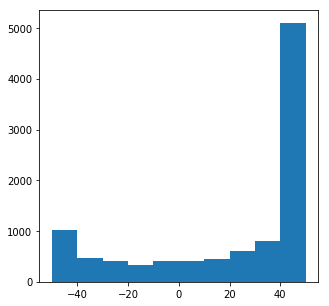

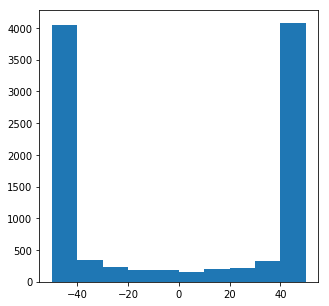

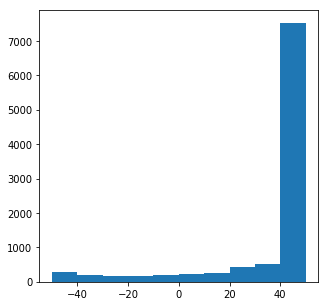

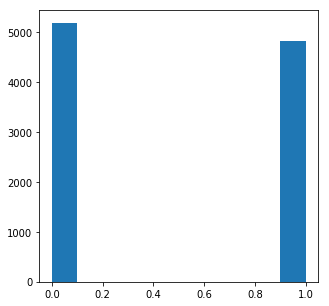

In [3]:
##Plot the data 
i=0
for col in x.T:
    fig,ax=plt.subplots(figsize = (5,5))
    ax.hist(col)
    i=i+1
fig,ax=plt.subplots(figsize = (5,5))
ax.hist(y[:,0])

In [4]:
x_train=x[:8000]
x_val=x[8000:]
y_train=y[:8000]
y_val=y[8000:]

In [5]:
#parameters
number_of_sample_per_tree=4000
number_of_variable_per_tree=3
number_of_tree=300

In [6]:
voters=[]
bags_indiv=[]
bags_features=[]
#Training
for i in range(number_of_tree):
    #bagging on training example and features
    bag_indiv=np.random.choice(x_train.shape[0], number_of_sample_per_tree, replace=False)
    bag_features=np.random.choice(x_train.shape[1], number_of_variable_per_tree, replace=False)
    x_loc=x_train[bag_indiv]
    #Weak Learner
    tree=DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=3)
    local_model=tree.fit(x_loc[:,bag_features],y_train[bag_indiv])
    #keep track of bags and local voter model
    voters.append(local_model)
    bags_indiv.append(bag_indiv)
    bags_features.append(bag_features)
    

In [7]:
#validation predictions
votes=np.zeros([x_val.shape[0],1])
for i in range(number_of_tree):
    #collecting votes
    votes=votes+voters[i].predict(x_val[:,bags_features[i]]).reshape(-1,1)
votes=votes/number_of_tree

In [8]:
np.float32(votes)

array([[0.35333332],
       [0.68      ],
       [0.44      ],
       ...,
       [0.81      ],
       [0.20333333],
       [0.05      ]], dtype=float32)

In [9]:
votes.round()

array([[0.],
       [1.],
       [0.],
       ...,
       [1.],
       [0.],
       [0.]])

In [10]:
accuracy_score(y_val,votes.round())


0.907